# Setting up the simulation #

**Date:** 21-12-2024 <br>
**Course:** Modelling 2B

In [1]:
#import statements
from astropy.time import Time
import numpy as np

import SaturnMoonLibrary as sml
import SaturnMoonLibrary.SaturnMoonSimulation as sms
import simulation

#### Horizons Database ####

To get data from  <a href="https://ssd.jpl.nasa.gov/horizons/">NASA's JPL Horizons Database</a> we will use the python libary <a href="https://astroquery.readthedocs.io/en/latest/">Astroquery</a>. To talk to the Horizons Database we will need to give the database the ID's of the objects we are interested in. In the table below one can see the ID's of Saturn and the moon we will be interested in. 

| **Object**   | **ID** |
|--------------|--------|
| Saturn       | 699    |
| Mimas        | 601    |
| Enceladus    | 602    |
| Tethys       | 603    |
| Dione        | 604    |
| Rhea         | 605    |
| Titan        | 606    |
| Hyperion     | 607    |
| Iapetus      | 608    |
| Phoebe       | 609    |
| Janus        | 610    |
| Epimetheus   | 611    |
| Helene       | 612    |
| Telesto      | 613    |
| Calypso      | 614    |
| Atlas        | 615    |
| Prometheus   | 616    |
| Pandora      | 617    |
| Pan          | 618    |
| Daphnis      | 635    |


PreLoaded Datasets

In [2]:
saturn_data = {
    "Saturn": {"ID": 699, "Mass": 5.6834e+26},  # Mass in kg
    "Mimas": {"ID": 601, "Mass": 3.7493e+19},  # Mass in kg
    "Enceladus": {"ID": 602, "Mass": 1.08022e+20},  # Mass in kg
    "Tethys": {"ID": 603, "Mass": 6.17449e+20},  # Mass in kg
    "Dione": {"ID": 604, "Mass": 1.095452e+21},  # Mass in kg
    "Rhea": {"ID": 605, "Mass": 2.306518e+21},  # Mass in kg
    "Titan": {"ID": 606, "Mass": 1.3452e+23},  # Mass in kg
    "Hyperion": {"ID": 607, "Mass": 5.62e+18},  # Mass in kg
    "Iapetus": {"ID": 608, "Mass": 1.805635e+21},  # Mass in kg
    "Phoebe": {"ID": 609, "Mass": 8.292e+18},  # Mass in kg
    "Janus": {"ID": 610, "Mass": 1.898e+18},  # Mass in kg
    "Epimetheus": {"ID": 611, "Mass": 5.264e+17},  # Mass in kg
    "Helene": {"ID": 612, "Mass": 1.2e+17},  # Mass in kg
    "Telesto": {"ID": 613, "Mass": 4.1e+16},  # Mass in kg
    "Calypso": {"ID": 614, "Mass": 4e+16},  # Mass in kg
    "Atlas": {"ID": 615, "Mass": 7e+16},  # Mass in kg
    "Prometheus": {"ID": 616, "Mass": 1.6e+17},  # Mass in kg
    "Pandora": {"ID": 617, "Mass": 1.4e+17},  # Mass in kg
    "Pan": {"ID": 618, "Mass": 4.95e+15},  # Mass in kg
    "Daphnis": {"ID": 635, "Mass": 6.5e+13}  # Mass in kg
}

# saturn_data = {
#     "Saturn": {"ID": 699, "Mass": 5.6834e+26},  # Mass in kg
#     "Titan": {"ID": 606, "Mass": 1.3452e+23},  # Mass in kg
# }

Loading from Horizons:

        Use async methods instead. [SaturnMoonLibrary.SaturnMoonSimulation.horizons_api]


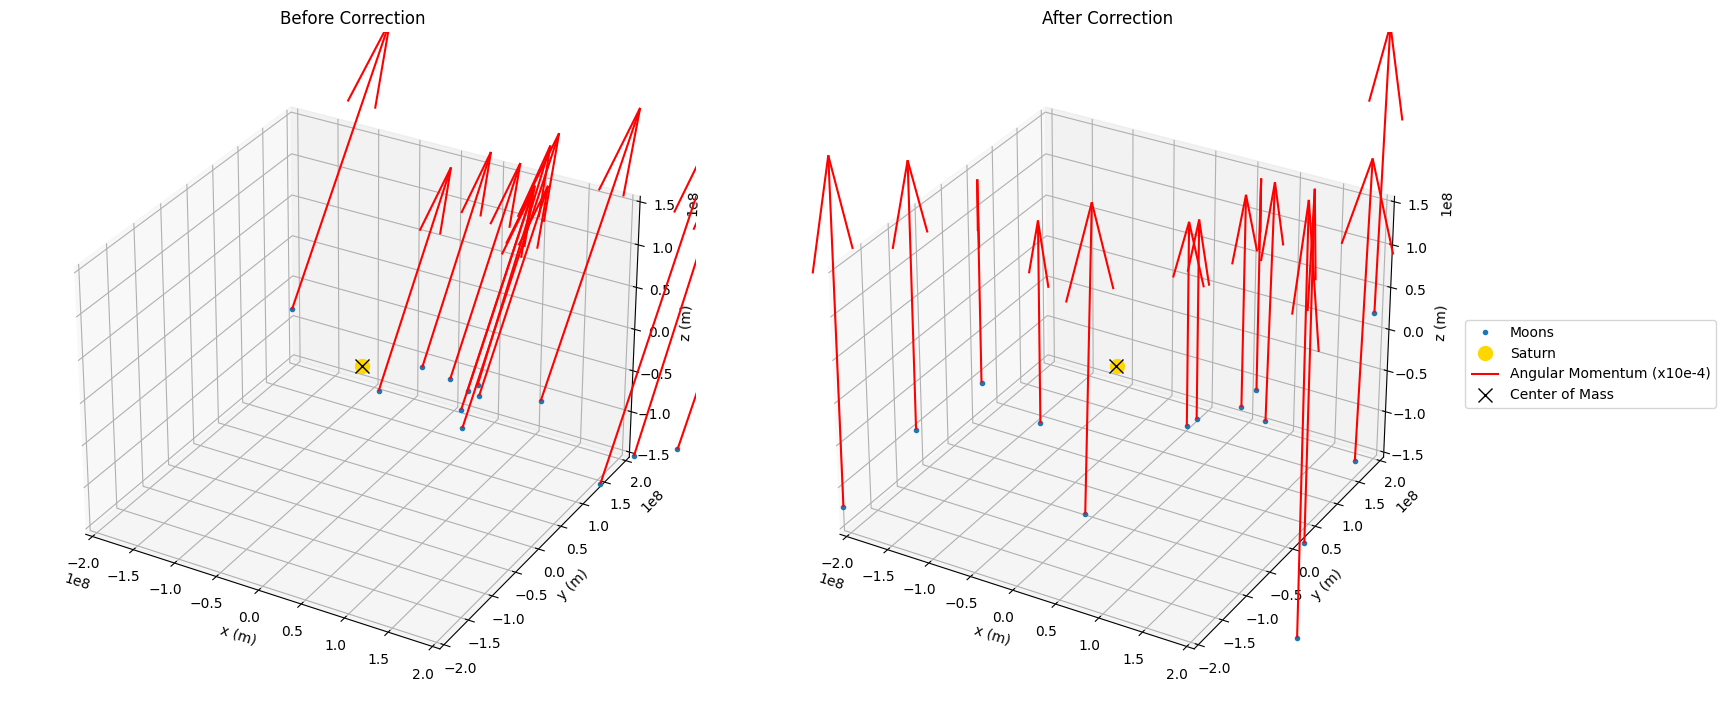

In [3]:
jd = Time('2017-11-18').jd  # Converts to Julian date
epoch = [jd]
rotated_dict = sms.get_horizons_data(saturn_data,epoch,True) # The True refers to if the function returns the dict or not

In [8]:
# Some utilities related to the file system  

# Folder List
# folder_list = sml.list_all_folders(".\SaturnModelDatabase\horizons_data")
# print(folder_list)

# File printer
# directory_path = ".\SaturnModelDatabase\horizons_data\{folder_list[0]}"
# sml.list_all_files(directory_path)

#delete utility

# folder_name = folder_list[0] #'initial_data_moon_count_20_start_date_2017-11-18_00-00-00.000_creation_date_2024-12-24_12-29-04' # Or folder_list[i] also works
# sms.delete_dataset(folder_name)

Maninpulating data

In [ ]:
#want to see saturn_data_final
#print(saturn_data_final)

#want dataframe of all data
# df = sms.convert_to_dataframe(saturn_data_final,include_mass=False ,include_time_independent= True, include_vectors=True)
# print(df)

#want latex table of all the timeindependent variables: (see: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_latex.html)
# df_lat = sms.convert_to_dataframe(saturn_data_final,include_vectors=False)
# print(df_lat.to_latex(index=False,
# #                  formatters={"name": str.upper},
#                   float_format="{:.1f}".format,
# )) 

#want an C++ vector that can becopied into the C++ file:
# string = sms.convert_to_cpp_vector(rotated_dict)
# print(string)

# Want a list for the pybind11 library to input in to the simulation
# lijst = sms.generate_list_for_cpp_conversion(rotated_dict)

some presets:

Run simulation

In [6]:
jd = Time('2017-11-18').jd  # Converts to Julian date

# Parameters
data_dict= saturn_data
epoch = [jd] 
dt = 600
timesteps = 2000 * 10
num_test_particles = 25000*2
saved_points_modularity = 32*5
skipped_timesteps = 0
inner_radius = 70000 * 1000.0#70000 *1000 #116500 * 1000.0 # Inner boundary of the ring (meters)
outer_radius = 140000 * 1000.0#140000*1000 #119000 * 1000.0 # Outer boundary of the ring (meters)
J2 = -16290e-6 
ring_folder_name = "ring_data_2025-01-08"
number_of_radial_bins = 0
number_of_azimuthal_bins = 0
theta_max = np.pi*2
include_particle_moon_collisions = True
include_shear_forces = False #this parameter is only for including the non symplectic hill equation, for syplectic use Quinn integrator
integrator = "Leapfrog"
initialisation_method = "standard"

#Huygens gap: Huygens Gap	117,680	285–400,

#run simulation
sms.run_simulation(
    data_dict,
    epoch,
    dt,
    timesteps,
    num_test_particles,
    saved_points_modularity,
    skipped_timesteps,
    inner_radius,
    outer_radius,
    J2,
    ring_folder_name,
    number_of_radial_bins,
    number_of_azimuthal_bins,
    theta_max,
    include_particle_moon_collisions,
    include_shear_forces,
    integrator,
    initialisation_method
)

{'File Name': 'simulation 2025-01-06_17-06-29.bin ', 'Moon Names': 'Saturn, Mimas, Enceladus, Tethys, Dione, Rhea, Titan, Hyperion, Iapetus, Phoebe, Janus, Epimetheus, Helene, Telesto, Calypso, Atlas, Prometheus, Pandora, Pan, Daphnis', 'Epoch': '[2458075.5]', 'dt': '600.0', 'Timesteps': '10000', 'Number of Test Particles': '10000', 'Saved Points Modularity': '5', 'Skipped Timesteps': '0', 'Inner Radius': '70000000.0', 'Outer Radius': '140000000.0', 'J2': '-0.01629', 'Ring Folder': 'ring_data_2025-01-07', 'Number of Radial Bins': '2000', 'Number of Azimuthal Bins': '720', 'Theta Max': '0.7853981633974483', 'Include Shear Forces': 'True', 'Include Particle-Moon Collisions': 'True', 'Numerical Integrator': 'Leapfrog', 'Initialisation Method': 'standard'}
0
Dataset with the same Julian start date and bodies already exists. Foldername: initial_data_moon_count_20_start_date_2017-11-18_00-00-00-000_creation_date_2025-02-04_21-24-42
1: Initializing output file
2: Initializing simulation envir

In [ ]:
# looped quantities
#multiple simulations:
jd = Time('2017-11-18').jd  # Converts to Julian date

# Parameters
data_dict= saturn_data
epoch = [jd] 
# dt = 1200
timesteps = 1000000
num_test_particles = 0
saved_points_modularity = 100
skipped_timesteps = 0
inner_radius = 70000 * 1000.0#70000 *1000 #116500 * 1000.0 # Inner boundary of the ring (meters)
outer_radius = 140000 * 1000.0#140000*1000 #119000 * 1000.0 # Outer boundary of the ring (meters)
J2 = -16290e-6 
ring_folder_name = "ring_data_2025-01-09"
number_of_radial_bins = 0
number_of_azimuthal_bins = 0
theta_max = np.pi*2
include_particle_moon_collisions = False
include_shear_forces = False # Deprecated (this parameter is only for including the non symplectic hill equation, for syplectic use Quinn integrator)
integrator = "Yoshida 6th Order"
initialisation_method = "linear"
dt_ls = [2**i*600 for i in range(0,5)]
saved_points_modularity_list=[2**(5-i) for i in range(0,5)]
timesteps_list=[2**(5-i)*30000 for i in range(0,5)]
filename_ls = []
 
#run simulation
for dt,saved_points_modularity,timesteps in zip(dt_ls,saved_points_modularity_list,timesteps_list):
    print(f"simulation with dt = {dt}")
    fp = sms.run_simulation(
        data_dict,
        epoch,
        dt,
        timesteps,
        num_test_particles,
        saved_points_modularity,
        skipped_timesteps,
        inner_radius,
        outer_radius,
        J2,
        ring_folder_name,
        number_of_radial_bins,
        number_of_azimuthal_bins,
        theta_max,
        include_particle_moon_collisions,
        include_shear_forces,
        integrator,
        initialisation_method,
        return_filepath=True
    )
    filename_ls.append(fp)
print(filename_ls)

Getting Long format Data of Horizons Database

In [7]:
# test code of long horizons queries
epoch = [2458075.5]
dt = 540000
number_of_timesteps = 1000
number_of_saved_points = 201

sms.create_long_format_horizons_data(saturn_data, epoch, dt, number_of_timesteps, number_of_saved_points)

C:\Users\flori\AppData\Roaming\Python\Python311\site-packages\erfa\core.py:133: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
C:\Users\flori\AppData\Roaming\Python\Python311\site-packages\erfa\core.py:133: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


Dataset with the same Julian start date and bodies already exists. Foldername: initial_data_moon_count_19_start_date_2017-11-18_00-00-00-000_creation_date_2025-02-05_16-18-31
Header successfully created and written to .\SaturnModelDatabase\horizons_long_format_data\horizons_long 2025-02-06_17-02-24.bin
Binary data successfully written to .\SaturnModelDatabase\horizons_long_format_data\horizons_long 2025-02-06_17-02-24.bin
Long format horizons data successfully created at .\SaturnModelDatabase\horizons_long_format_data\horizons_long 2025-02-06_17-02-24.bin
